# 📊 Exploratory Data Analysis - Veille NLP

This notebook performs basic Exploratory Data Analysis on the collected and processed articles.

**Purpose:** Understand data distribution, quality, and patterns

**Steps:**
1. Load articles (raw, processed, classified)
2. Basic statistics
3. Distribution analysis
4. Quality assessment
5. Identify improvements


In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [10]:
# Load raw articles
raw_articles = []
try:
    with open('../data/articles_raw.jsonl', 'r', encoding='utf-8') as f:
        for line in f:
            raw_articles.append(json.loads(line))
    print(f"✓ Loaded {len(raw_articles)} raw articles")
except FileNotFoundError:
    print("❌ articles_raw.jsonl not found. Run: python main.py")

# Load processed articles
processed_articles = []
try:
    with open('../data/articles_processed.jsonl', 'r', encoding='utf-8') as f:
        for line in f:
            processed_articles.append(json.loads(line))
    print(f"✓ Loaded {len(processed_articles)} processed articles")
except FileNotFoundError:
    print("❌ articles_processed.jsonl not found")

# Load classified articles
classified_articles = []
try:
    with open('../data/articles_classified.jsonl', 'r', encoding='utf-8') as f:
        for line in f:
            classified_articles.append(json.loads(line))
    print(f"✓ Loaded {len(classified_articles)} classified articles")
except FileNotFoundError:
    print("❌ articles_classified.jsonl not found")

✓ Loaded 114 raw articles
✓ Loaded 114 processed articles
✓ Loaded 114 classified articles


## 2. Raw Data Statistics

In [11]:
if raw_articles:
    # Convert to DataFrame
    df_raw = pd.DataFrame(raw_articles)
    
    print("📊 RAW DATA STATISTICS")
    print(f"Total articles: {len(df_raw)}")
    print(f"\nColumns: {list(df_raw.columns)}")
    print(f"\nData types:\n{df_raw.dtypes}")
    print(f"\nMissing values:\n{df_raw.isnull().sum()}")
    
    # Sources
    source_counts = df_raw['source'].value_counts()
    print(f"\nArticles by source:\n{source_counts}")
    
    # Content length
    if 'content' in df_raw.columns:
        df_raw['content_length'] = df_raw['content'].str.len()
        print(f"\nContent length stats:\n{df_raw['content_length'].describe()}")

📊 RAW DATA STATISTICS
Total articles: 114

Columns: ['title', 'url', 'content', 'source', 'date', 'author', 'score']

Data types:
title      object
url        object
content    object
source     object
date       object
author     object
score      object
dtype: object

Missing values:
title        0
url          0
content      0
source       0
date        60
author     114
score      114
dtype: int64

Articles by source:
source
HackerNews            60
TowardsDataScience    54
Name: count, dtype: int64

Content length stats:
count     114.000000
mean     1848.000000
std      1322.978632
min        20.000000
25%       828.000000
50%      1791.500000
75%      2575.000000
max      6121.000000
Name: content_length, dtype: float64


## 3. Preprocessing Quality

🔧 PREPROCESSING QUALITY
Total articles: 114

Tokens per article:
count    114.000000
mean     156.385965
std      109.750845
min        2.000000
25%       71.750000
50%      154.500000
75%      219.750000
max      466.000000
Name: num_tokens, dtype: float64

Token loss:
count    114.000000
mean      47.309211
std        9.568339
min       12.500000
25%       43.822500
50%       49.775000
75%       53.475000
max       59.300000
Name: token_loss_pct, dtype: float64


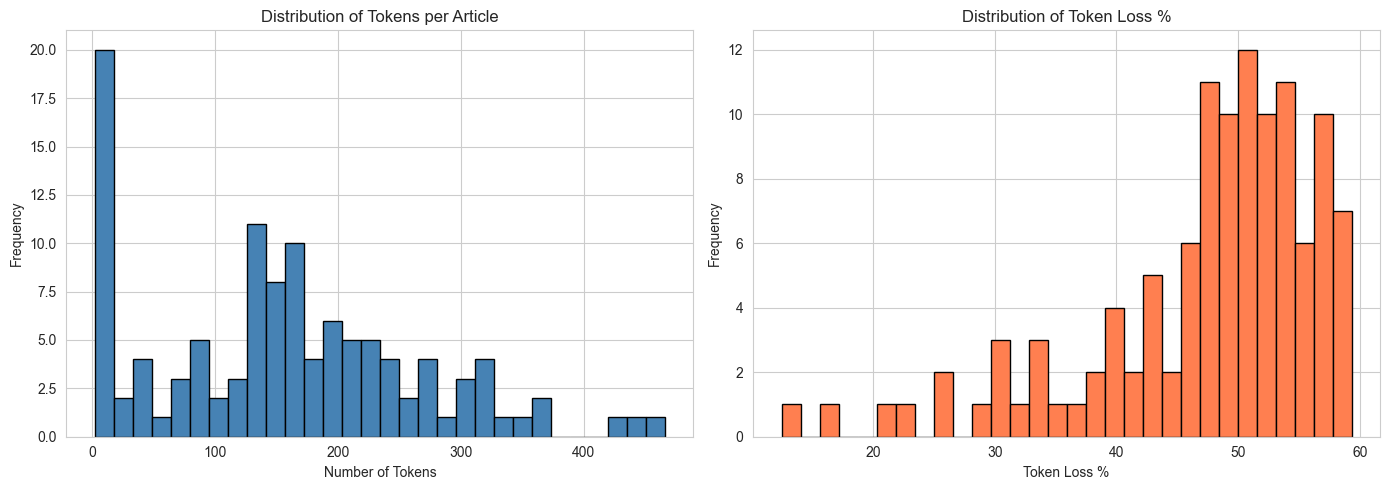

In [12]:
if processed_articles:
    df_processed = pd.DataFrame(processed_articles)
    
    print("🔧 PREPROCESSING QUALITY")
    print(f"Total articles: {len(df_processed)}")
    
    # Token statistics
    if 'num_tokens' in df_processed.columns:
        print(f"\nTokens per article:\n{df_processed['num_tokens'].describe()}")
        print(f"\nToken loss:\n{df_processed['token_loss_pct'].describe()}")
        
        # Visualize
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        axes[0].hist(df_processed['num_tokens'], bins=30, color='steelblue', edgecolor='black')
        axes[0].set_title('Distribution of Tokens per Article')
        axes[0].set_xlabel('Number of Tokens')
        axes[0].set_ylabel('Frequency')
        
        axes[1].hist(df_processed['token_loss_pct'], bins=30, color='coral', edgecolor='black')
        axes[1].set_title('Distribution of Token Loss %')
        axes[1].set_xlabel('Token Loss %')
        axes[1].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()

## 4. Classification Results

🤖 CLASSIFICATION RESULTS
Total articles: 114

Topic distribution:
topic_prediction
Advanced        37
Research        17
Technical       17
Opinion         14
News            12
Beginner        11
Intermediate     6
Name: count, dtype: int64

Topic confidence stats:
count    114.000000
mean       0.434971
std        0.150903
min        0.229200
25%        0.337725
50%        0.410550
75%        0.484525
max        0.926800
Name: topic_confidence, dtype: float64


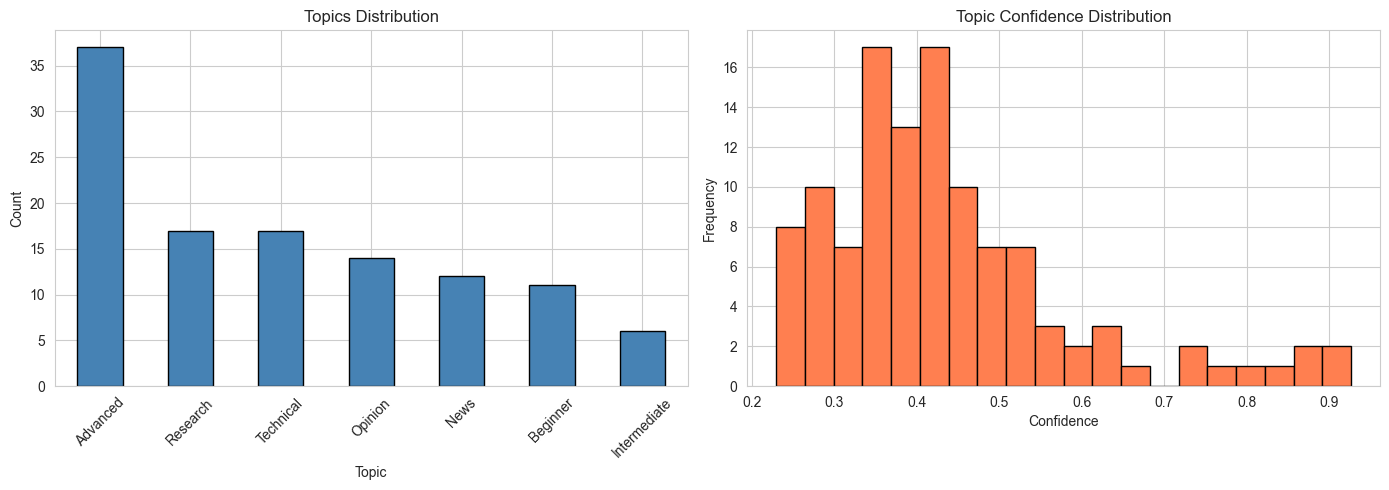


Sentiment distribution:
sentiment_label
Critique    67
Positif     34
Neutre      13
Name: count, dtype: int64


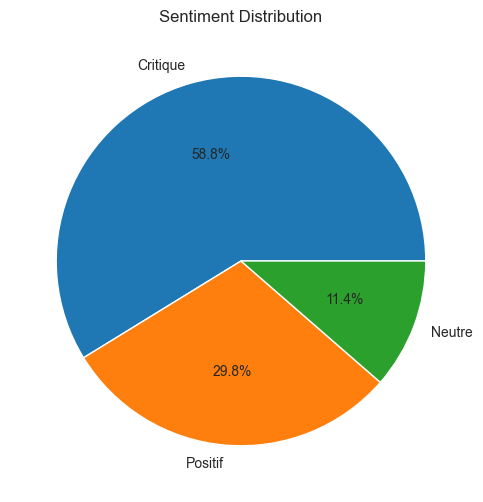


Duplicates: 4 (3.5%)


In [13]:
if classified_articles:
    df_classified = pd.DataFrame(classified_articles)
    
    print("🤖 CLASSIFICATION RESULTS")
    print(f"Total articles: {len(df_classified)}")
    
    # Topics
    if 'topic_prediction' in df_classified.columns:
        topic_counts = df_classified['topic_prediction'].value_counts()
        print(f"\nTopic distribution:\n{topic_counts}")
        print(f"\nTopic confidence stats:\n{df_classified['topic_confidence'].describe()}")
        
        # Visualize
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        topic_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
        axes[0].set_title('Topics Distribution')
        axes[0].set_xlabel('Topic')
        axes[0].set_ylabel('Count')
        axes[0].tick_params(axis='x', rotation=45)
        
        axes[1].hist(df_classified['topic_confidence'], bins=20, color='coral', edgecolor='black')
        axes[1].set_title('Topic Confidence Distribution')
        axes[1].set_xlabel('Confidence')
        axes[1].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
    
    # Sentiments
    if 'sentiment_label' in df_classified.columns:
        sentiment_counts = df_classified['sentiment_label'].value_counts()
        print(f"\nSentiment distribution:\n{sentiment_counts}")
        
        # Visualize
        sentiment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))
        plt.title('Sentiment Distribution')
        plt.ylabel('')
        plt.show()
    
    # Duplicates
    if 'is_duplicate' in df_classified.columns:
        num_duplicates = df_classified['is_duplicate'].sum()
        print(f"\nDuplicates: {num_duplicates} ({100*num_duplicates/len(df_classified):.1f}%)")

## 4.1 Source Comparison Analysis

C:\Users\yassi\AppData\Local\Temp\ipykernel_13924\878940774.py:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\yassi\Desktop\Hexa\NLP\Traitement des Langages Naturels\Formation_NLP_project_baseline\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


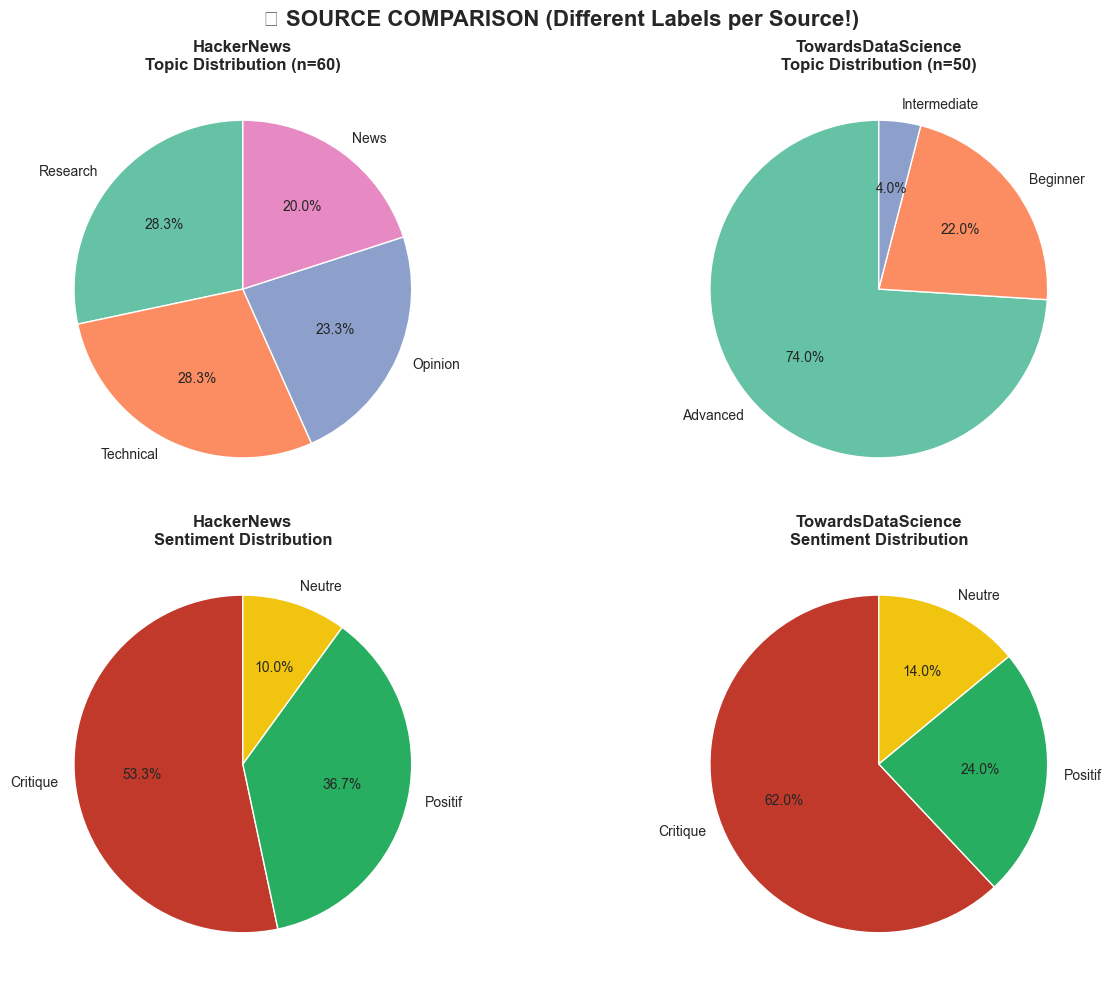


📊 SOURCE STATISTICS (Different labels per source)

📌 HackerNews (60 articles)
Labels used: ['News', 'Opinion', 'Technical', 'Research']
   • Research: 17 (28.3%)
   • Technical: 17 (28.3%)
   • Opinion: 14 (23.3%)
   • News: 12 (20.0%)
   📈 Avg Confidence: 0.35

📌 TowardsDataScience (50 articles)
Labels used: ['Beginner', 'Advanced', 'Intermediate']
   • Advanced: 37 (74.0%)
   • Beginner: 11 (22.0%)
   • Intermediate: 2 (4.0%)
   📈 Avg Confidence: 0.54


In [14]:
# Source Comparison: SEPARATE visualizations per source (different labels!)
if classified_articles:
    df = pd.DataFrame(classified_articles)
    df_unique = df[df['is_duplicate'] == False].copy()
    
    sources = df_unique['source'].unique()
    
    fig, axes = plt.subplots(2, len(sources), figsize=(7*len(sources), 10))
    fig.suptitle('📊 SOURCE COMPARISON (Different Labels per Source!)', fontsize=16, fontweight='bold')
    
    for i, source in enumerate(sources):
        source_df = df_unique[df_unique['source'] == source]
        
        # Row 1: Topic Distribution (Pie)
        ax_topic = axes[0, i] if len(sources) > 1 else axes[0]
        topic_counts = source_df['topic_prediction'].value_counts()
        colors = plt.cm.Set2(range(len(topic_counts)))
        ax_topic.pie(topic_counts.values, labels=topic_counts.index, autopct='%1.1f%%', 
                    colors=colors, startangle=90)
        ax_topic.set_title(f'{source}\nTopic Distribution (n={len(source_df)})', fontweight='bold')
        
        # Row 2: Sentiment Distribution (Pie)
        ax_sent = axes[1, i] if len(sources) > 1 else axes[1]
        sent_counts = source_df['sentiment_label'].value_counts()
        sent_colors = {'Positif': '#27ae60', 'Neutre': '#f1c40f', 'Critique': '#c0392b'}
        colors = [sent_colors.get(s, 'gray') for s in sent_counts.index]
        ax_sent.pie(sent_counts.values, labels=sent_counts.index, autopct='%1.1f%%',
                   colors=colors, startangle=90)
        ax_sent.set_title(f'{source}\nSentiment Distribution', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics per source
    print("\n" + "="*70)
    print("📊 SOURCE STATISTICS (Different labels per source)")
    print("="*70)
    
    for source in sources:
        source_df = df_unique[df_unique['source'] == source]
        print(f"\n{'='*40}")
        print(f"📌 {source} ({len(source_df)} articles)")
        print(f"{'='*40}")
        
        # Topic distribution
        print("Labels used:", list(source_df['topic_prediction'].unique()))
        topic_dist = source_df['topic_prediction'].value_counts()
        for topic, count in topic_dist.items():
            print(f"   • {topic}: {count} ({count/len(source_df)*100:.1f}%)")
        
        # Average confidence
        avg_conf = source_df['topic_confidence'].mean()
        print(f"   📈 Avg Confidence: {avg_conf:.2f}")

## 4.2 Word Clouds 

C:\Users\yassi\AppData\Local\Temp\ipykernel_13924\2425995982.py:37: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\yassi\Desktop\Hexa\NLP\Traitement des Langages Naturels\Formation_NLP_project_baseline\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


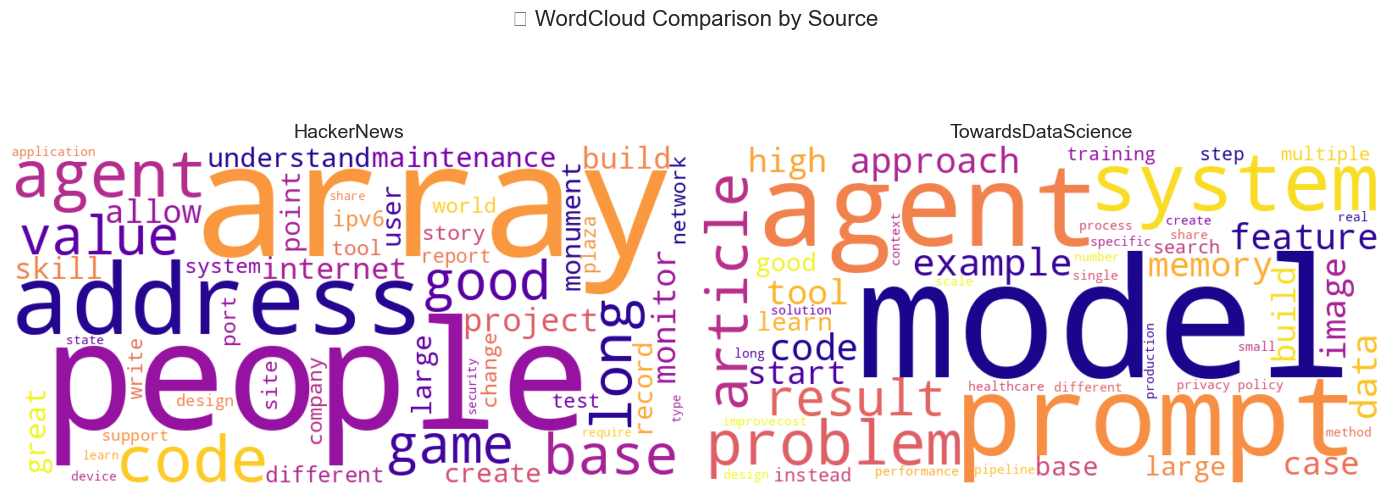

In [15]:
# ═══════════════════════════════════════════════════════════════════════════
# WORDCLOUD VISUALIZATION
# ═══════════════════════════════════════════════════════════════════════════

# Define extra stopwords to filter out common non-meaningful words
stopwords_extra = {'use', 'like', 'get', 'make', 'one', 'new', 'way', 'also', 
                   'would', 'could', 'much', 'take', 'see', 'come', 'know', 
                   'want', 'thing', 'year', 'day', 'time', 'work', 'just', 
                   'even', 'first', 'last', 'well', 'back', 'now', 'look', 
                   'only', 'think', 'give', 'say', 'find', 'tell', 'try', 
                   'ask', 'need', 'feel', 'become', 'leave', 'put', 'mean', 
                   'keep', 'let', 'begin', 'seem', 'help', 'show', 'hear', 
                   'play', 'run', 'move', 'live', 'believe', 'datum', 'not'}

# WordCloud per source
sources = df_classified['source'].unique()

fig, axes = plt.subplots(1, len(sources), figsize=(7*len(sources), 6))
if len(sources) == 1:
    axes = [axes]

for ax, source in zip(axes, sources):
    source_tokens = []
    for tokens in df_classified[df_classified['source'] == source]['tokens'].dropna():
        if isinstance(tokens, list):
            source_tokens.extend([t for t in tokens if len(t) > 3 and t not in stopwords_extra])
    
    if source_tokens:
        text = ' '.join(source_tokens)
        wc = WordCloud(width=800, height=400, background_color='white', 
                      colormap='plasma', max_words=50).generate(text)
        ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'{source}', fontsize=14)

plt.suptitle('🔍 WordCloud Comparison by Source', fontsize=16)
plt.tight_layout()
plt.show()

## 5. Sample Articles

In [16]:
if classified_articles:
    print("📄 SAMPLE ARTICLES")
    
    # Show 3 random articles with all details
    import random
    sample = random.sample(classified_articles, min(3, len(classified_articles)))
    
    for i, article in enumerate(sample, 1):
        print(f"\n{'='*70}")
        print(f"Article {i}:")
        print(f"{'='*70}")
        print(f"Title: {article.get('title', 'N/A')[:60]}...")
        print(f"Source: {article.get('source', 'N/A')}")
        print(f"Topic: {article.get('topic_prediction', 'N/A')} (confidence: {article.get('topic_confidence', 'N/A')})")
        print(f"Sentiment: {article.get('sentiment_label', 'N/A')}")
        print(f"Duplicate: {article.get('is_duplicate', False)}")
        print(f"Tokens: {article.get('num_tokens', 'N/A')}")

📄 SAMPLE ARTICLES

Article 1:
Title: How to Maximize Claude Code Effectiveness...
Source: TowardsDataScience
Topic: Advanced (confidence: 0.4373)
Sentiment: Neutre
Duplicate: False
Tokens: 194

Article 2:
Title: IP Addresses Through 2025...
Source: HackerNews
Topic: Research (confidence: 0.2609)
Sentiment: Critique
Duplicate: False
Tokens: 466

Article 3:
Title: Lunar Radio Telescope to Unlock Cosmic Mysteries...
Source: HackerNews
Topic: Research (confidence: 0.379)
Sentiment: Neutre
Duplicate: False
Tokens: 227


## 6. Recommendations for Improvement

Based on the EDA, here are potential improvements:

### Collecte
- [ ] Add more sources (GitHub, Medium, Twitter)
- [ ] Implement caching to avoid re-scraping
- [ ] Add retry logic for timeout handling

### Preprocessing
- [ ] Compare stemming vs lemmatization
- [ ] Test impact of removing accents
- [ ] Analyze token loss distribution

### Classification
- [ ] Fine-tune classifier on 50+ annotated examples
- [ ] Implement custom NER for specific technologies
- [ ] Calculate precision/recall/F1 metrics

### Report
- [ ] Add wordcloud visualization
- [ ] Create trend analysis (week-over-week)
- [ ] Export to markdown/JSON format
